# SC1015 Mini Project

### Introduction
According to the World Health Organization, cardiovascular diseases are the leading cause of death globally, taking an estimated 17.9 million lives each year. Cardiovascular diseases are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Thus, it is important to be able to identify those at high risk of heart diseases as this can ensure that they receive appropriate and timely treatment, which can prevent premature deaths.

Heart failure - frequently precipitated by cardiovascular disease - persists as a significant threat in Singapore, contributing to 20% of the mortality rate in the nation in 2017. As such, the utilisation of a robust machine learning model is vital in the early prediction of a possible heart disease, so as to allow for early intervention.

Our project ultimately aims to benefit hospitals by identifying optimal variables to accurately predict a patient's susceptibility to developing heart diseases based on various attributes, enabling early detection. This also allows healthcare professionals to intervene effectively should a patient be at risk of heart failure. For example, if cholesterol or high blood pressure emerges as a major predictor, interventions can be concentrated on cholesterol or blood pressure management strategies. 

Furthermore, with limited healthcare resources, understanding the most influential variables can help hospitals stratify patients into risk categories as well as prioritise screening and preventive efforts before irreversible damage occurs. Frequent blood tests and unwarranted assessments can also hurt the well-being of patients. As such, by focusing on attributes with the greatest indication of heart failure, we can assist in reducing unnecessary damage and utilisation of resources.

The dataset used is the ‘Heart Failure Prediction Dataset’ found on Kaggle, which can be accessed at this link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
print("Number of columns/variables:",data.shape[1])
print("Number of observations:",data.shape[0])

Number of columns/variables: 12
Number of observations: 918


#### Attribute Information obtained from Kaggle
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mg/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST depression induced by exercise relative to rest [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

#### General Initial Observations of Dataset:
- There are `12` variables and `918` observations.
- There are `5` variables categorised as object by default. Upon analysing the attributes information, there should be `7` categorical variables instead. `(Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease)`
- There are `7` variables categorised as numerical by default. Upon analysing the attribute information, there should be `5` numerical variables instead. `(Age, RestingBP, Cholesterol, MaxHR, Oldpeak)`
- Upon evaluating the attribute information provided, the default type for `FastingBS` and `HeartDisease` have be incorrectly identified as `int64` and should instead be categorical.
- The response variable is `HeartDisease` while the other 11 variables are predictors.
- None of the variables appear to have missing values as there was no NULL counts detected.

In [5]:
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [6]:
# Categorical Predictors
data[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].describe()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918,918
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,725,496,704,552,547,460


In [7]:
# Numeric Predictors
data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [8]:
data.loc[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [9]:
data.loc[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


#### Anomalies Detected
While the variables do not seem to have any missing values at first glance and is noted on the data information page (https://archive.ics.uci.edu/dataset/45/heart+disease) to not have any missing values, we found that `172` rows has the variable `Cholesterol` as `0`. This is clinically impossible and thus, we believe that it might be possible that the the values of `Cholesterol` for these rows are incorrectly recorded/ was not recorded. Thus, we will be removing these entries (with the value `0` for the variable `Cholesterol`).

We also found `1` row that has the variable `RestingBP` as `0` which is also clinically impossible. Thus, we believe that it might be possible that the the value of `RestingBP` for this row is incorrectly recorded/ was not recorded. Thus, we will be removing this entry (with the value `0` for the variable `RestingBP`).

In [10]:
data.drop(data.loc[data['RestingBP']==0].index, inplace=True)
data.drop(data.loc[data['Cholesterol']==0].index, inplace=True)
data.reset_index(drop=True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    object 
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 70.1+ KB


#### Cleaning Review
After cleaning the dataset by re-categorising mislabelled variables as well as removing the 172 rows with incorrectly recorded `Cholesterol` or `RestingBP` variables, we now have `746` observations.

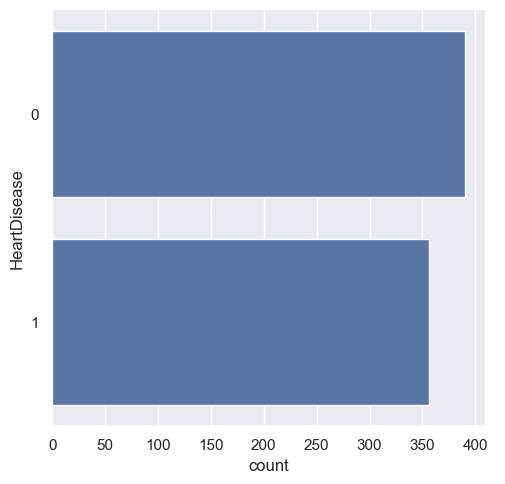

In [11]:
sb.catplot(y = 'HeartDisease', data = data, kind = "count")

In [12]:
count0, count1 = data['HeartDisease'].value_counts()
print("Ratio of classes is Normal(0) : Heart disease(1)  = ", count0, ":", count1)

Ratio of classes is Normal(0) : Heart disease(1)  =  390 : 356


Since the values are relatively close (390 vs 356), there is not really the issue of a class imbalance.

## Categorical Predictors

In [13]:
# Categorical Predictors
data[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].describe()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,746,746,746,746,746,746
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,564,370,621,445,459,354


## 1) Sex

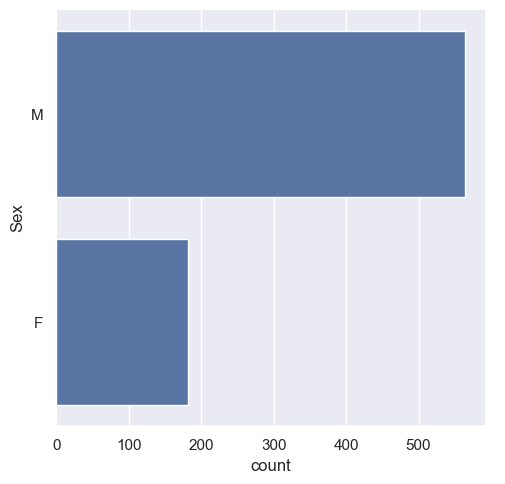

In [14]:
# Sex
sb.catplot(y = 'Sex', data = data, kind = "count")

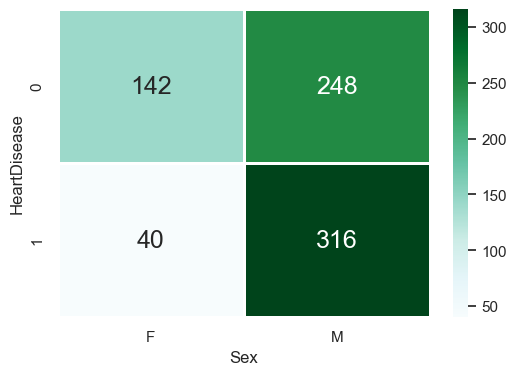

In [15]:
# HeartDisease vs Sex
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','Sex']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [16]:
countF0, countF1, countM0, countM1 = data.groupby(['Sex','HeartDisease']).size()

percentageF_withHeartDisease = (countF1 / (countF0 + countF1)) * 100
percentageM_withHeartDisease = (countM1 / (countM0 + countM1)) * 100

print("Percentage of Female with heart disease: {:.2f}%".format(percentageF_withHeartDisease))
print("Percentage of Male with heart disease: {:.2f}%".format(percentageM_withHeartDisease))

Percentage of Female with heart disease: 21.98%
Percentage of Male with heart disease: 56.03%


#### Observations
There is a jarring difference in the percentage of Male patients with heart disease compared to Female patients (21.98%) with heart disease, as the percentage for Male patients is significantly higher (56.03%). This could suggest that Male patients are more likely to have heart diseases. However, this factor may not be the most reliable as there are significantly more Male patient entries than there are Female. A more balanced dataset, especially in terms of gender, can play a vital role in training models that are more equitable and reliable.

##  2) ChestPainType

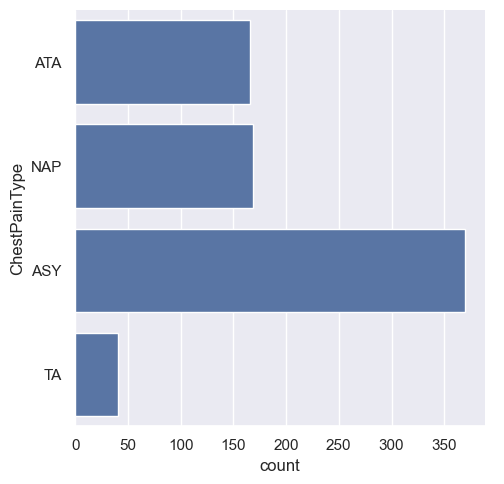

In [17]:
# ChestPainType
sb.catplot(y = 'ChestPainType', data = data, kind = "count")

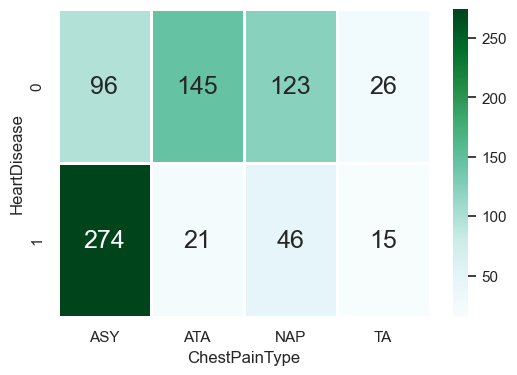

In [18]:
# HeartDisease vs ChestPainType
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','ChestPainType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [19]:
countASY0, countASY1, countATA0, countATA1, countNAP0, countNAP1, countTA0, countTA1 = data.groupby(['ChestPainType','HeartDisease']).size()

percentageASY_withHeartDisease = (countASY1 / (countASY0 + countASY1)) * 100
percentageATA_withHeartDisease = (countATA1 / (countATA0 + countATA1)) * 100
percentageNAP_withHeartDisease = (countNAP1 / (countNAP0 + countNAP1)) * 100
percentageTA_withHeartDisease = (countTA1 / (countTA0 + countTA1)) * 100

print("Percentage of Asymptomatic(ASY) with heart disease: {:.2f}%".format(percentageASY_withHeartDisease))
print("Percentage of Atypical Angina(ATA) with heart disease: {:.2f}%".format(percentageATA_withHeartDisease))
print("Percentage of Non-Anginal Pain(NAP) with heart disease: {:.2f}%".format(percentageNAP_withHeartDisease))
print("Percentage of Typical Angina(TA) with heart disease: {:.2f}%".format(percentageTA_withHeartDisease))

Percentage of Asymptomatic(ASY) with heart disease: 74.05%
Percentage of Atypical Angina(ATA) with heart disease: 12.65%
Percentage of Non-Anginal Pain(NAP) with heart disease: 27.22%
Percentage of Typical Angina(TA) with heart disease: 36.59%


#### Observations
TA (Typical Angina): Common heart-related chest pain.
ATA (Atypical Angina): Chest discomfort that's not typical angina.
NAP (Non-Anginal Pain): Pain not related to the heart.
ASY (Asymptomatic): Absence of chest pain.

The percentage of patients without ChestPain symptoms (ChestPainType is Asymptomatic(ASY)) that have heart disease is the highest among the 4. The percentages of patients with ChestPain symptoms that have heart disease are all below 50%.

However, we expected that those with ChestPain symptoms would more likely have heart disease. This could suggest that there is poor/no relationship between ChestPainType and HeartDisease. This could also signify that those suffering from heart disease may not necessarily develop chest pains or any sort of symptoms, suggesting a more proactive screening approach is required for early detection.

##  3) FastingBS

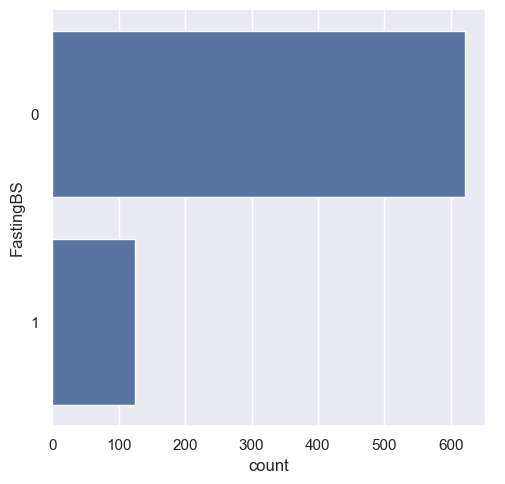

In [20]:
# FastingBS
sb.catplot(y = 'FastingBS', data = data, kind = "count")

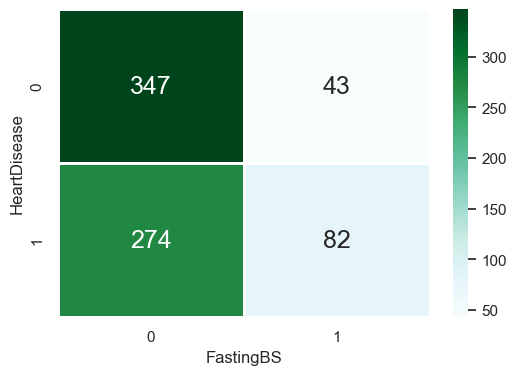

In [21]:
# HeartDisease vs FastingBS
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','FastingBS']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [22]:
count0BS0, count0BS1, count1BS0, count1BS1 = data.groupby(['FastingBS','HeartDisease']).size()

percentage0BS_withHeartDisease = (count0BS1 / (count0BS0 + count0BS1)) * 100
percentage1BS_withHeartDisease = (count1BS1 / (count1BS0 + count1BS1)) * 100

print("Percentage of patients with fasting blood sugar below 120mg/dl with heart disease: {:.2f}%".format(percentage0BS_withHeartDisease))
print("Percentage of patients with fasting blood sugar above 120mg/dl with heart disease: {:.2f}%".format(percentage1BS_withHeartDisease))

Percentage of patients with fasting blood sugar below 120mg/dl with heart disease: 44.12%
Percentage of patients with fasting blood sugar above 120mg/dl with heart disease: 65.60%


#### Observations
The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. (https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=Rationale%3A,and%20monitoring%20glycemia%20are%20recommended.)

Patients with a fasting blood glucose of above 125 mg/dL is considered to be diabetic, and have a higher risk of developing heart disease. (https://www.healthhub.sg/live-healthy/diabetes-and-heart-disease)

This could explain why the percentage of patients with fasting blood sugar above 120mg/dl with heart disease is higher, it is possible that there is a relationship between FastingBS and HeartDisease. However, the difference between the two percentages is not large (21.48%), suggesting that the relationship between FastingBs and HeartDisease could be moderate or weak.

##  4) RestingECG

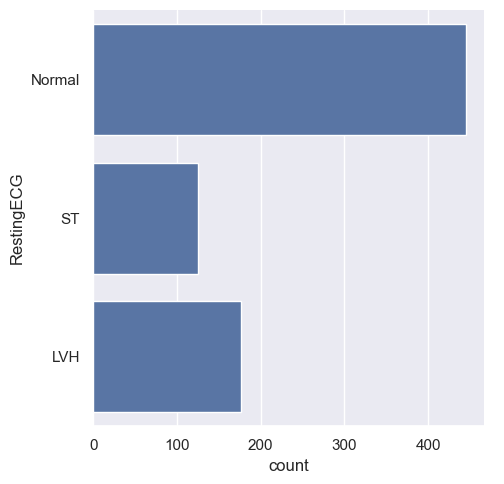

In [23]:
# RestingECG
sb.catplot(y = 'RestingECG', data = data, kind = "count")

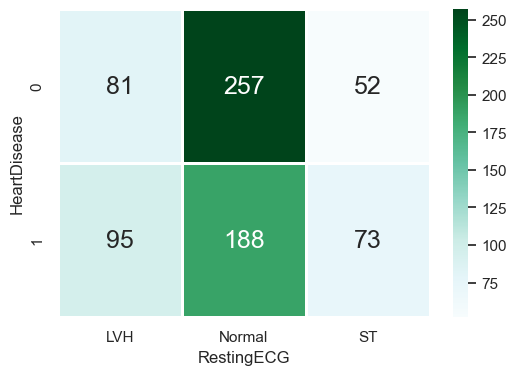

In [24]:
# HeartDisease vs RestingECG
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','RestingECG']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [25]:
countLVH0, countLVH1,countNorm0, countNorm1,countST0, countST1 = data.groupby(['RestingECG','HeartDisease']).size()

percentageLVH_withHeartDisease = (countLVH1 / (countLVH0 + countLVH1)) * 100
percentageNorm_withHeartDisease = (countNorm1 / (countNorm0 + countNorm1)) * 100
percentageST_withHeartDisease = (countST1 / (countST0 + countST1)) * 100

print("Percentage of LVH with heart disease: {:.2f}%".format(percentageLVH_withHeartDisease))
print("Percentage of Normal with heart disease: {:.2f}%".format(percentageNorm_withHeartDisease))
print("Percentage of ST with heart disease: {:.2f}%".format(percentageST_withHeartDisease))

Percentage of LVH with heart disease: 53.98%
Percentage of Normal with heart disease: 42.25%
Percentage of ST with heart disease: 58.40%


#### Observations
Though marginally, patients found with abnormalities with their RestingECG readings have a generally higher percentage of them having heart disease, compared to those with normal ECG readings. This could suggest that there is relationship between the patient's RestingECG and their susceptibility to heart disease, though it is likely to be weak.

This could signify that, at rest, the patient's heart rate and rhythm may appear to be normal despite suffering heart disease. As such, inspecting the heart's activity at rest alone may not be enough to predict whether the patient is afflicted with heart disease.

### 5) ExerciseAngina

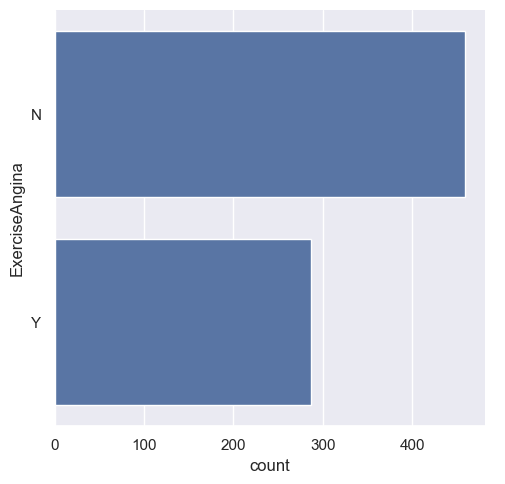

In [26]:
# ExerciseAngina
sb.catplot(y = 'ExerciseAngina', data = data, kind = "count")

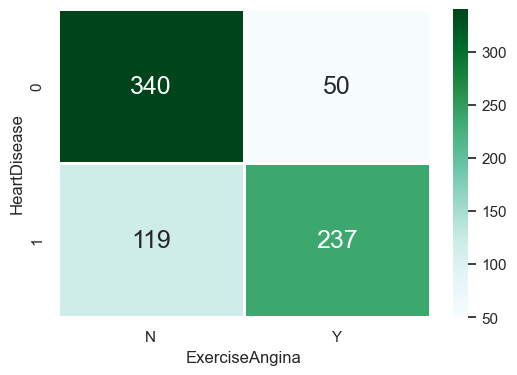

In [27]:
# HeartDisease vs ExerciseAngina
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','ExerciseAngina']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [28]:
countN0, countN1,countY0, countY1 = data.groupby(['ExerciseAngina','HeartDisease']).size()

percentageN_withHeartDisease = (countN1 / (countN0 + countN1)) * 100
percentageY_withHeartDisease = (countY1 / (countY0 + countY1)) * 100

print("Percentage of N with heart disease: {:.2f}%".format(percentageN_withHeartDisease))
print("Percentage of Y with heart disease: {:.2f}%".format(percentageY_withHeartDisease))

Percentage of N with heart disease: 25.93%
Percentage of Y with heart disease: 82.58%


#### Observations
The percentage of patients with exercise-induced angina that have heart disease is significantly higher than the patients without, suggesting that there might be a strong relationship.

When comparing this with the results ChestPainType, the percentage of patients suffering from chest pain during exercise with heart disease (82.58%) is much greater than when they are not exercising (36.59%). This suggests that the symptoms of heart disease are more apparent during periods of exercise, or are triggerred by exercise. In turn, this could mean that predictors that are associated with periods of exercise may have a stronger relationship with predicting heart disease.

### 6) ST_Slope

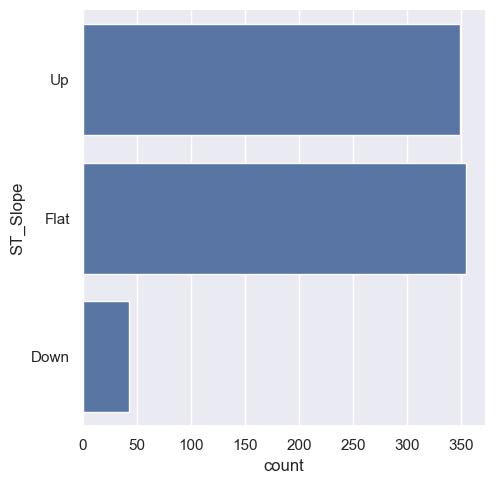

In [ ]:
# ST_Slope
sb.catplot(y = 'ST_Slope', data = data, kind = "count")

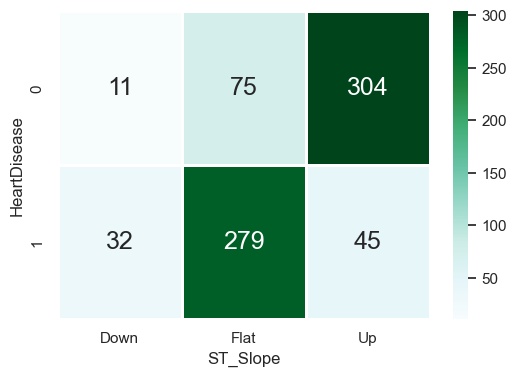

In [30]:
# HeartDisease vs ST_Slope
f = plt.figure(figsize=(6,4))
sb.heatmap(data.groupby(['HeartDisease','ST_Slope']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

In [31]:
countDown0, countDown1,countFlat0, countFlat1,countUp0, countUp1 = data.groupby(['ST_Slope','HeartDisease']).size()

percentageDown_withHeartDisease = (countDown1 / (countDown0 + countDown1)) * 100
percentageFlat_withHeartDisease = (countFlat1 / (countFlat0 + countFlat1)) * 100
percentageUp_withHeartDisease = (countUp1 / (countUp0 + countUp1)) * 100

print("Percentage of Down with heart disease: {:.2f}%".format(percentageDown_withHeartDisease))
print("Percentage of Flat with heart disease: {:.2f}%".format(percentageFlat_withHeartDisease))
print("Percentage of Up with heart disease: {:.2f}%".format(percentageUp_withHeartDisease))

Percentage of Down with heart disease: 74.42%
Percentage of Flat with heart disease: 78.81%
Percentage of Up with heart disease: 12.89%


#### Observations
The percentage of patients with Down and Flat `ST_Slope` that have heart disease is high (74.42% and 78.81% respectively), while the percentage of patients with Up `ST_Slope` that have heart disease is significantly low (12.89%). This could suggest a possible strong relationship, where patients with Up `ST_Slope` have a low chance of having heart disease, while patients having Down and Flat `ST_Slope` have a higher chance of having heart disease.

As such, this relationship may serve to aid medical professionals in priortising related treatements to patients who are more suspectible to heart failure, such as those whose ECG readings indicate `ST_Slope` Down or Flat over those whose `ST_Slope` indicate Up.

### Numeric Predictors

In [32]:
# Numeric Predictors
data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,140.226542,0.901609
std,9.505888,17.282750,59.153524,24.524107,1.072861
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,207.250000,122.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000
75%,59.000000,140.000000,275.000000,160.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


### 1) Age

<Axes: xlabel='Age'>

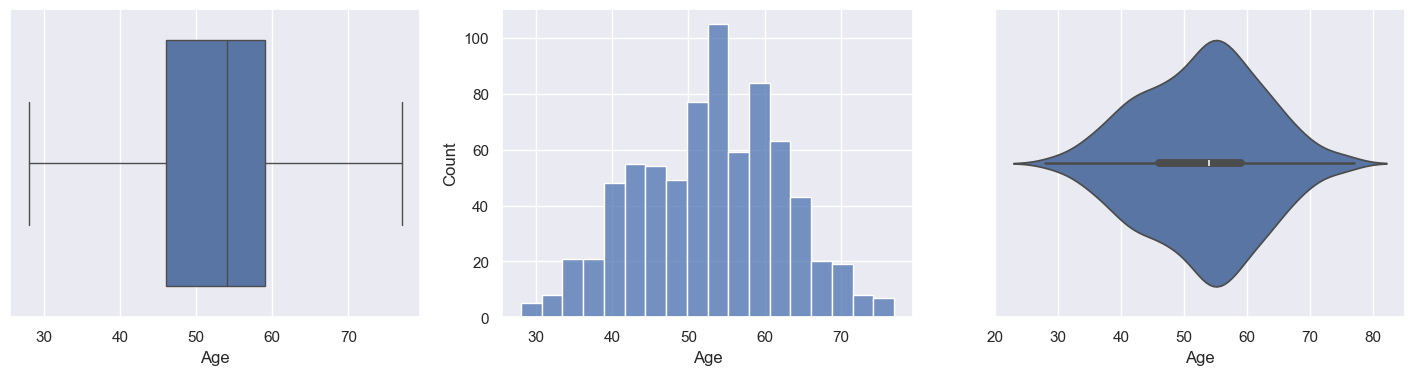

In [33]:
# Age
f, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.boxplot(data = data['Age'], orient = "h", ax = axes[0])
sb.histplot(data = data['Age'], ax = axes[1])
sb.violinplot(data = data['Age'], orient = "h", ax = axes[2])

<Axes: xlabel='Age', ylabel='HeartDisease'>

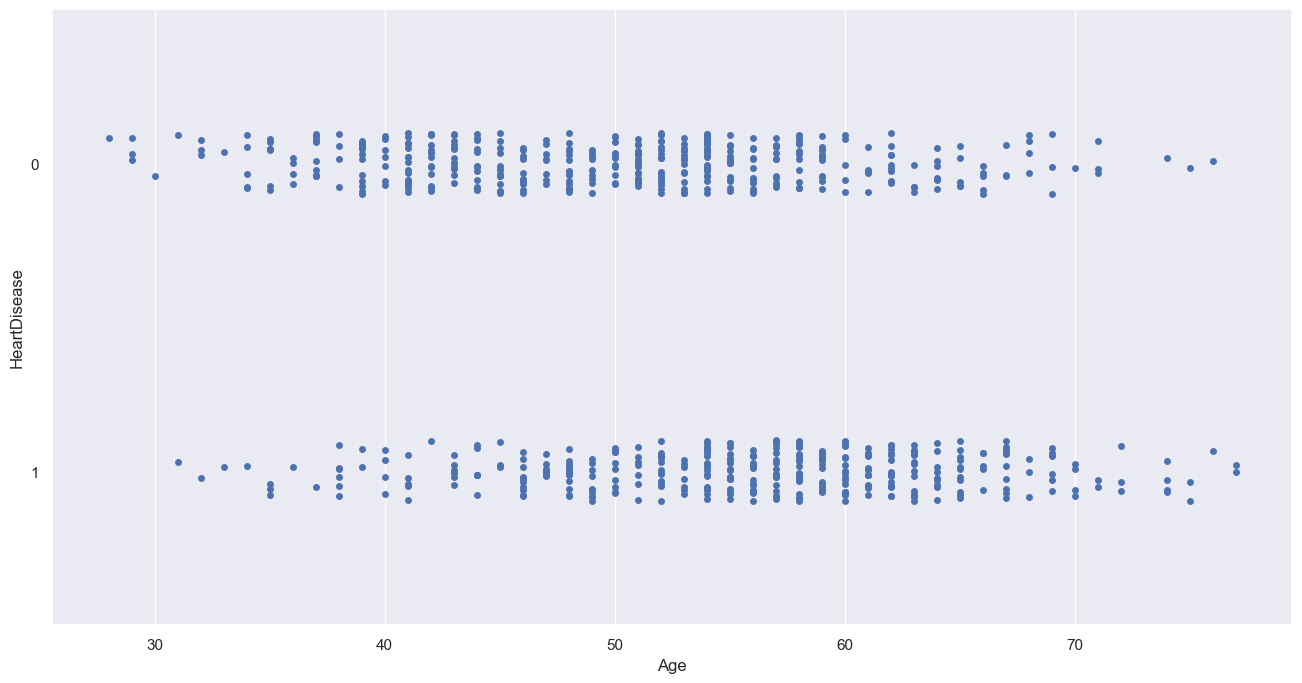

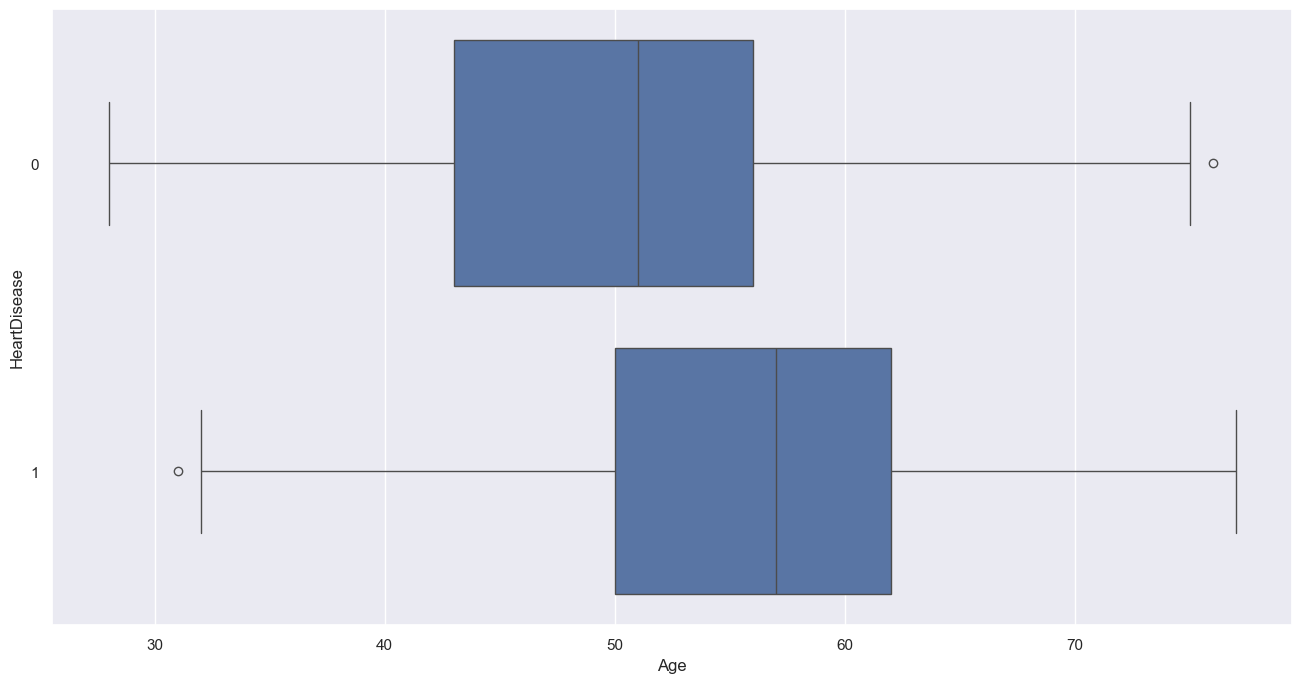

In [34]:
# HeartDisease vs Age
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'HeartDisease', data = data,orient="h")

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Age', y = 'HeartDisease', data = data,orient="h")

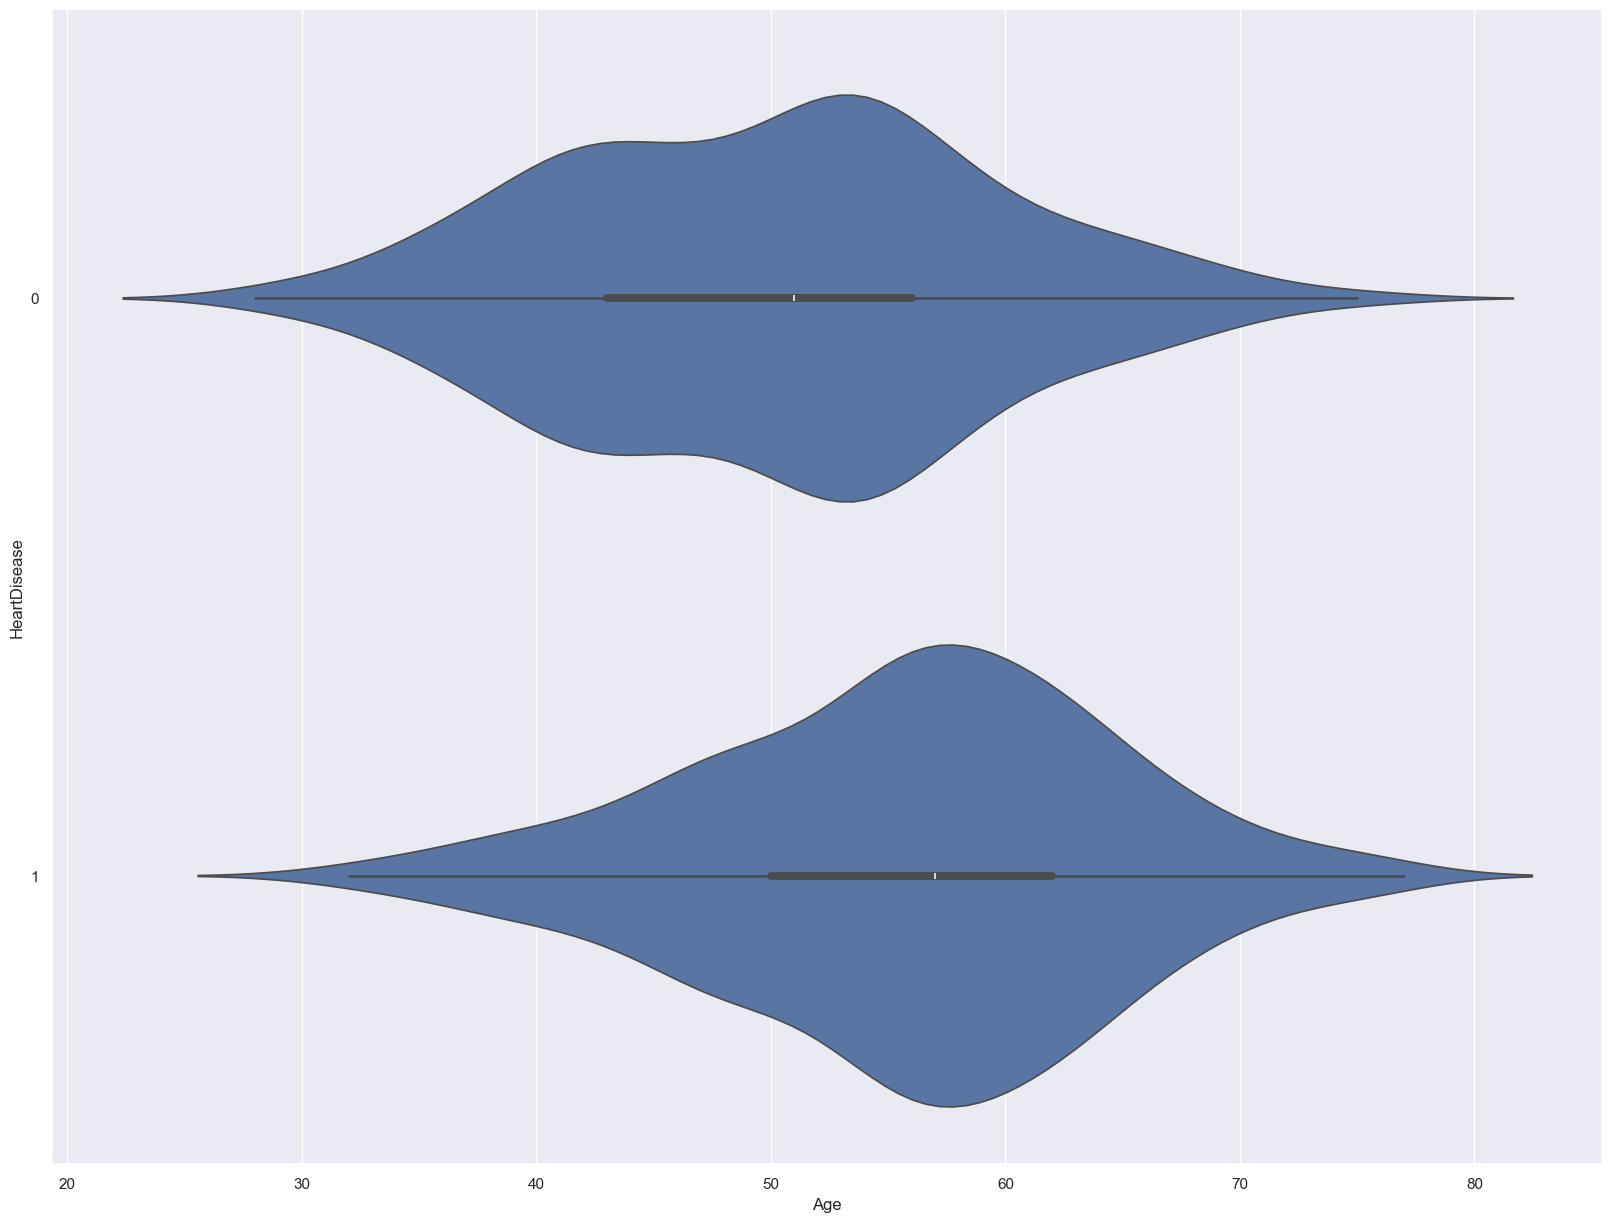

In [35]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='Age',y='HeartDisease', data=data, orient="h")
plt.show()

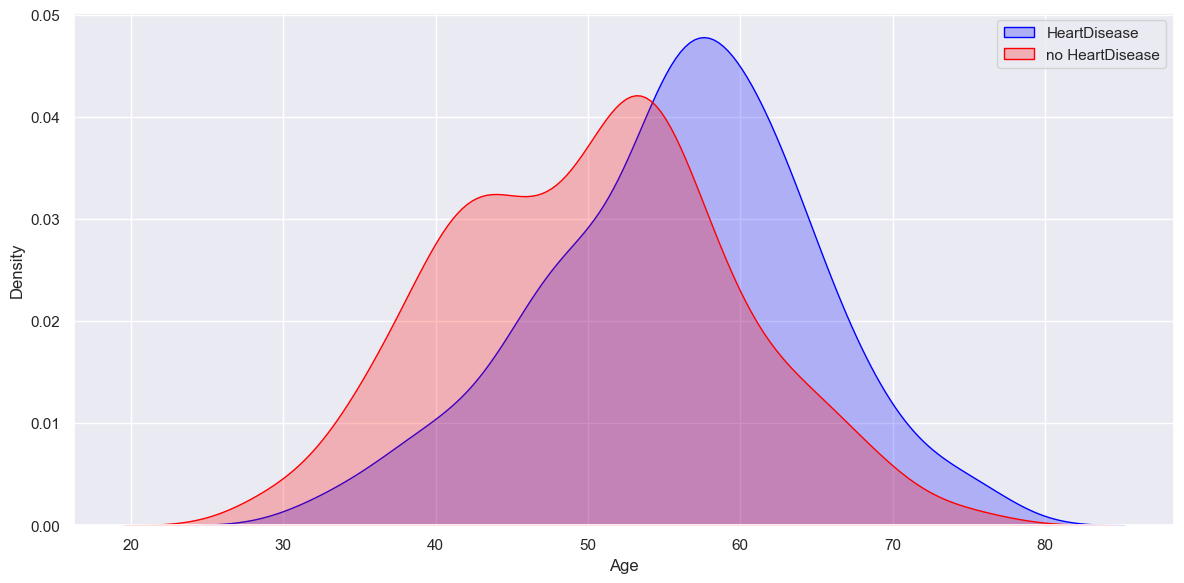

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.HeartDisease==1], x='Age',
            color='blue', label='HeartDisease', fill=True, ax=ax)
sb.kdeplot(data=data[data.HeartDisease==0], x='Age',
            color='red', label='no HeartDisease', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Observations
The KDE plot and box plot are the two most effective visualisations of the age range difference between patients with heart disease and those without heart disease.

In the box plot, the median age and quartiles of those suffering from heart disease are all higher than those who are not suffering from heart disease. The KDE plot for patients with heart disease is left skewed as compared to patients without heart disease, which is more right skewed. This means a greater portion of the patients with heart disease are to the right of the graph, while a greater portion of the patients without heart disease are to the left of the graph. This could imply that patients who are older are more likely to have heart diseases.

### 2) RestingBP

<Axes: xlabel='RestingBP'>

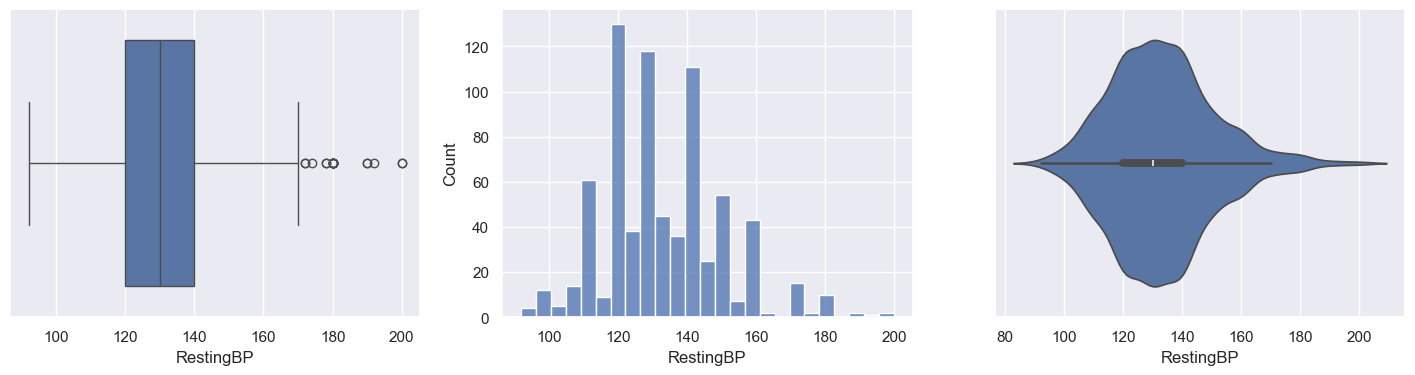

In [37]:
# RestingBP
f, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.boxplot(data = data['RestingBP'], orient = "h", ax = axes[0])
sb.histplot(data = data['RestingBP'], ax = axes[1])
sb.violinplot(data = data['RestingBP'], orient = "h", ax = axes[2])

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

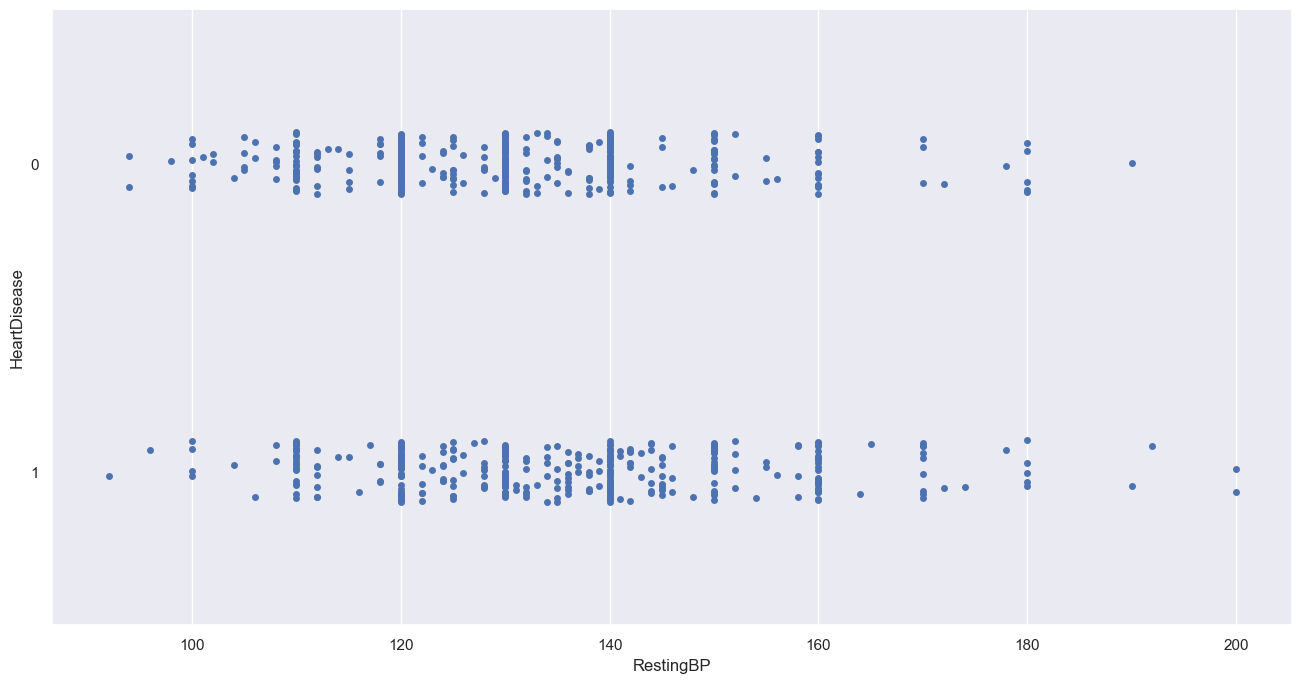

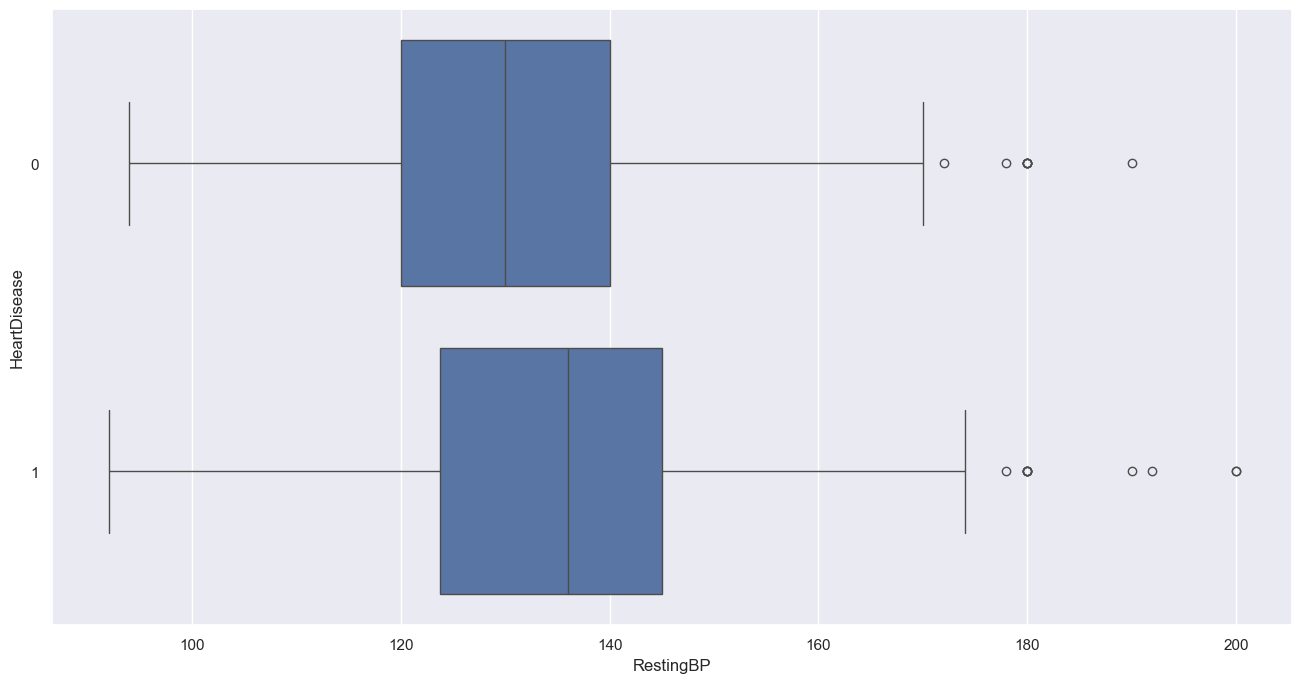

In [38]:
# HeartDisease vs RestingBP
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'RestingBP', y = 'HeartDisease', data = data,orient="h")

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'RestingBP', y = 'HeartDisease', data = data,orient="h")

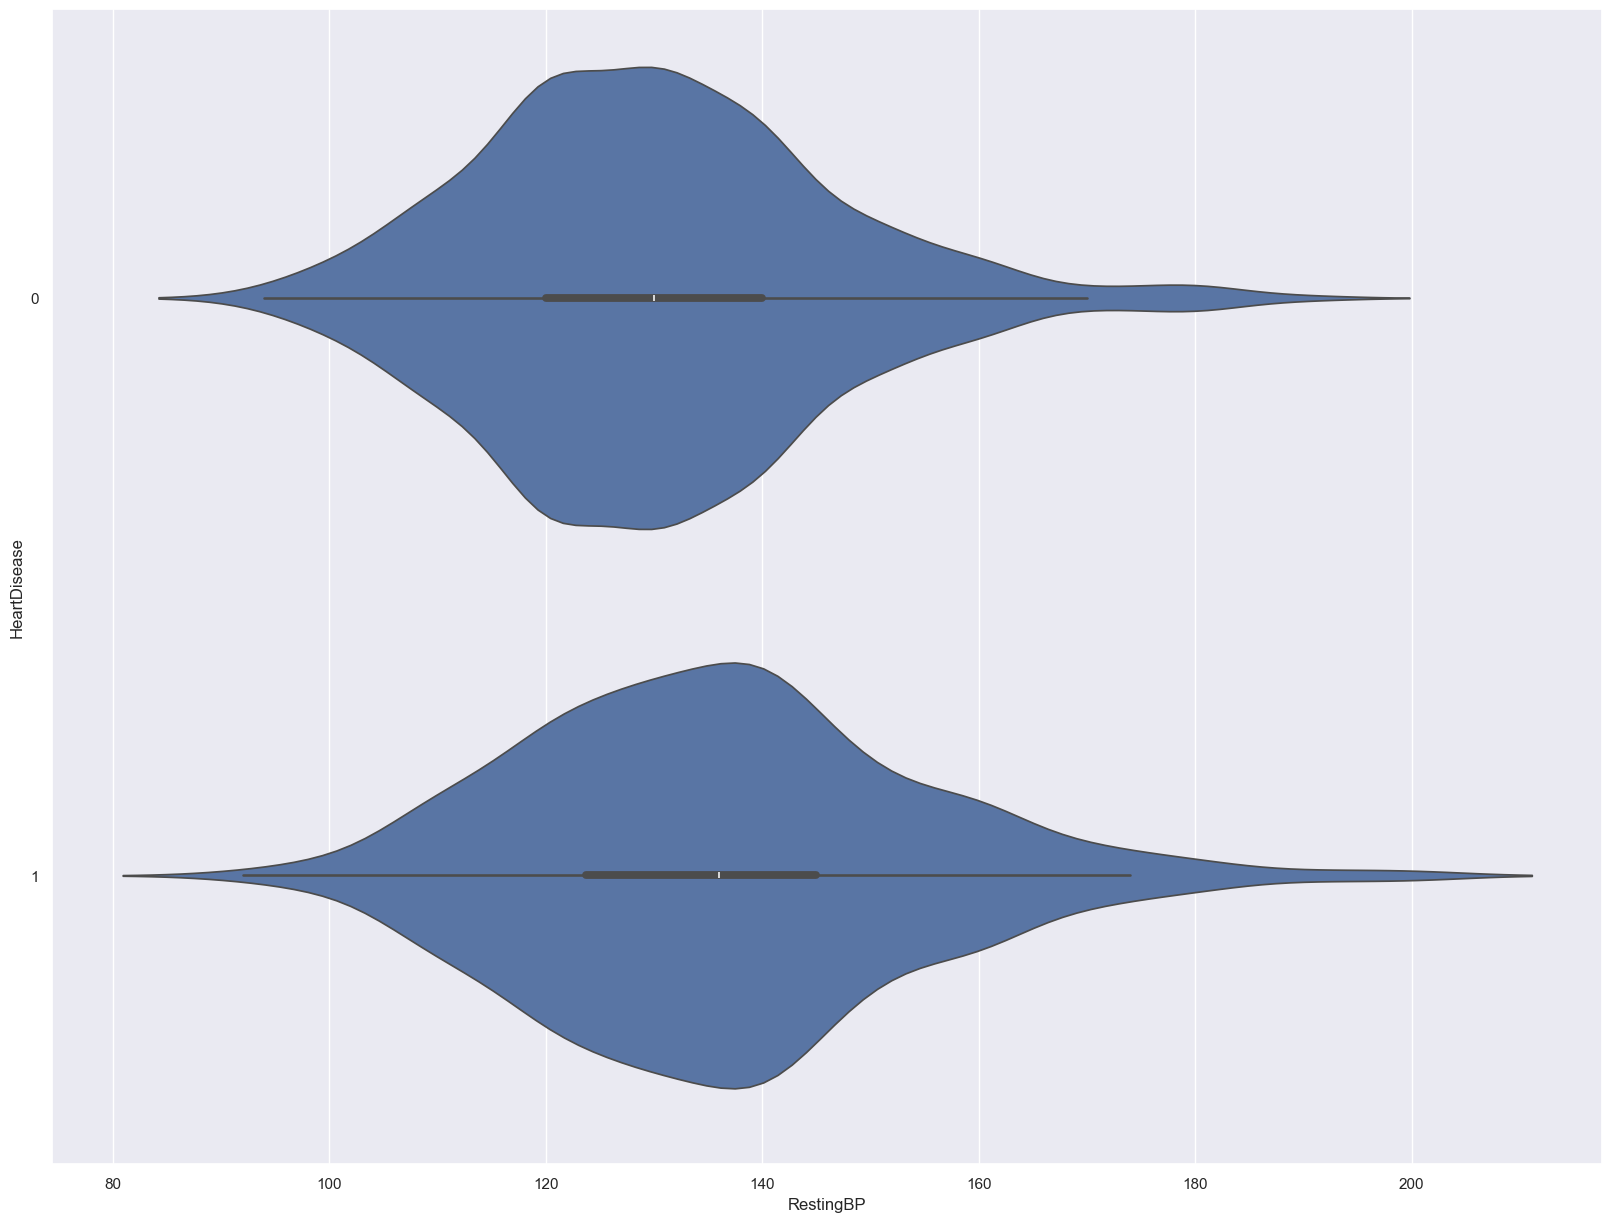

In [39]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='RestingBP',y='HeartDisease', data=data, orient="h")
plt.show()

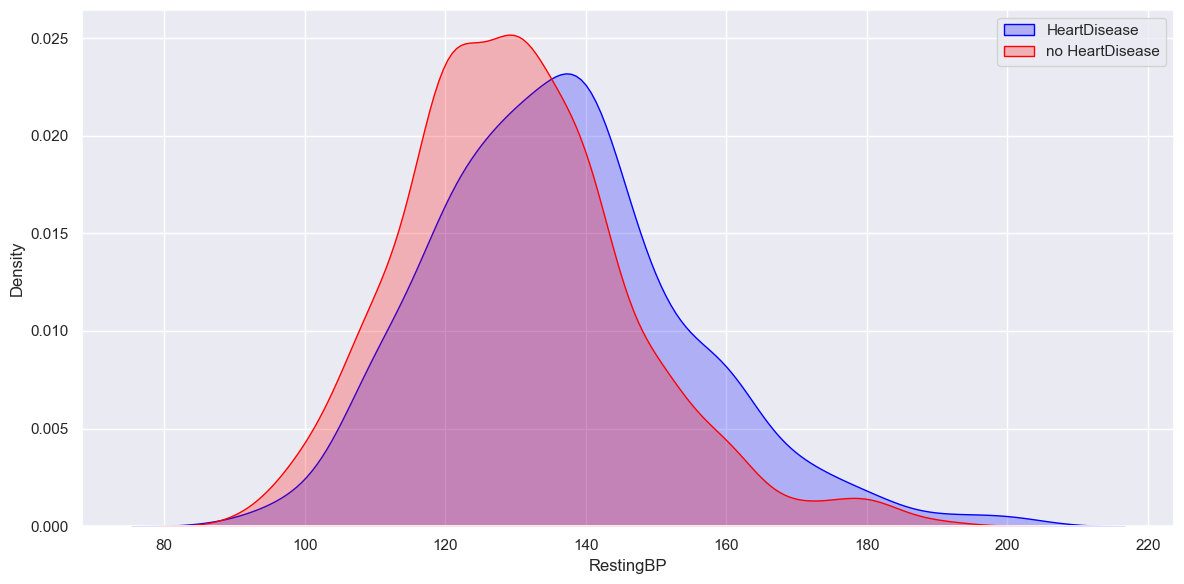

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.HeartDisease==1], x='RestingBP',
            color='blue', label='HeartDisease', fill=True, ax=ax)
sb.kdeplot(data=data[data.HeartDisease==0], x='RestingBP',
            color='red', label='no HeartDisease', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Observations
Once again, the box plot and KDE plot are the two most effective visualisations of the `RestingBP` difference of the patients with heart disease and those without heart disease. Though there is a difference in the plots, they are both to a small extent. 

The KDE plot for patients with heart disease is slightly more left-skewed compared to patients without heart disease, which could show the presence of a slight positive relationship between `RestingBP` and `HeartDisease`.

In the box plot, the median `RestingBP` and quartiles of those suffering from heart disease are all slightly higher than those who are not suffering from heart disease. 

This also reinforces the possible theory that variables associated with the resting state of the patient may not have a significant relationship with whether the patient has heart disease as the heart is not being actively pressured during a rest state.

### 3) Cholesterol

<Axes: xlabel='Cholesterol'>

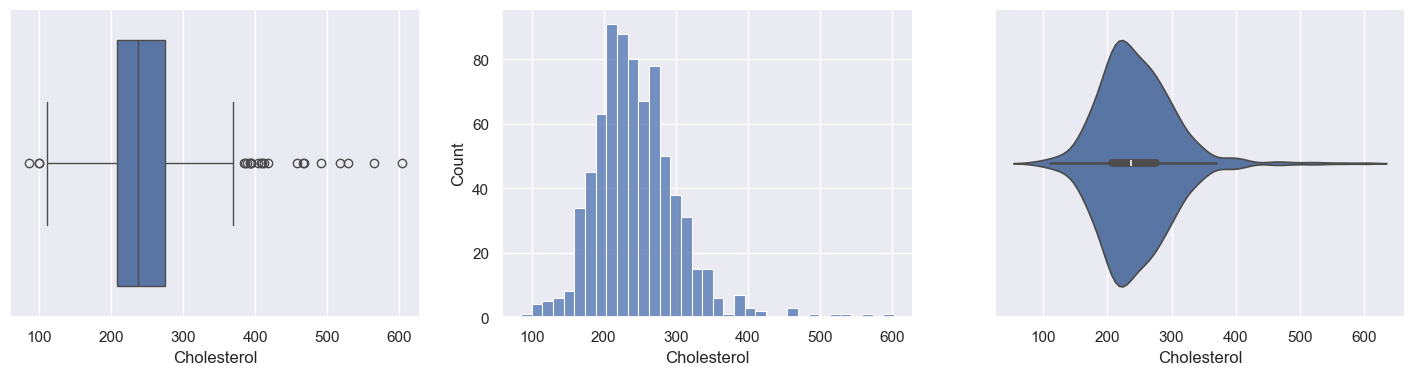

In [41]:
# Cholesterol
f, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.boxplot(data = data['Cholesterol'], orient = "h", ax = axes[0])
sb.histplot(data = data['Cholesterol'], ax = axes[1])
sb.violinplot(data = data['Cholesterol'], orient = "h", ax = axes[2])

<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

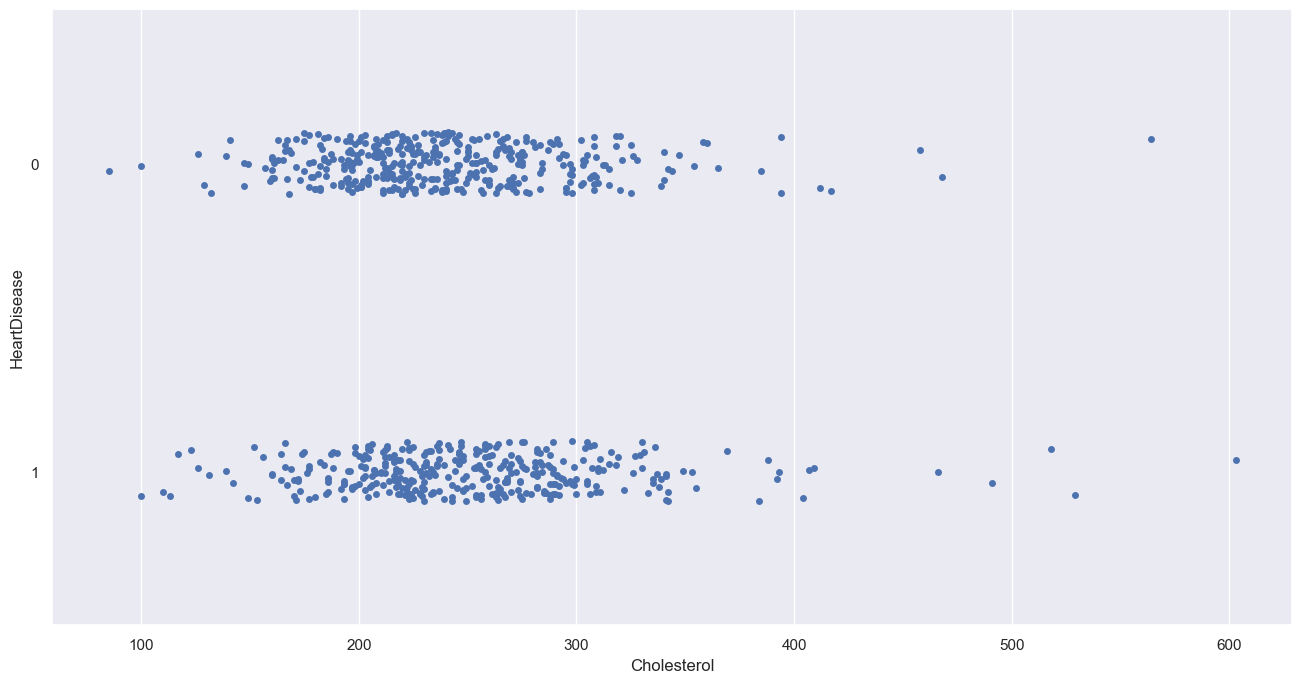

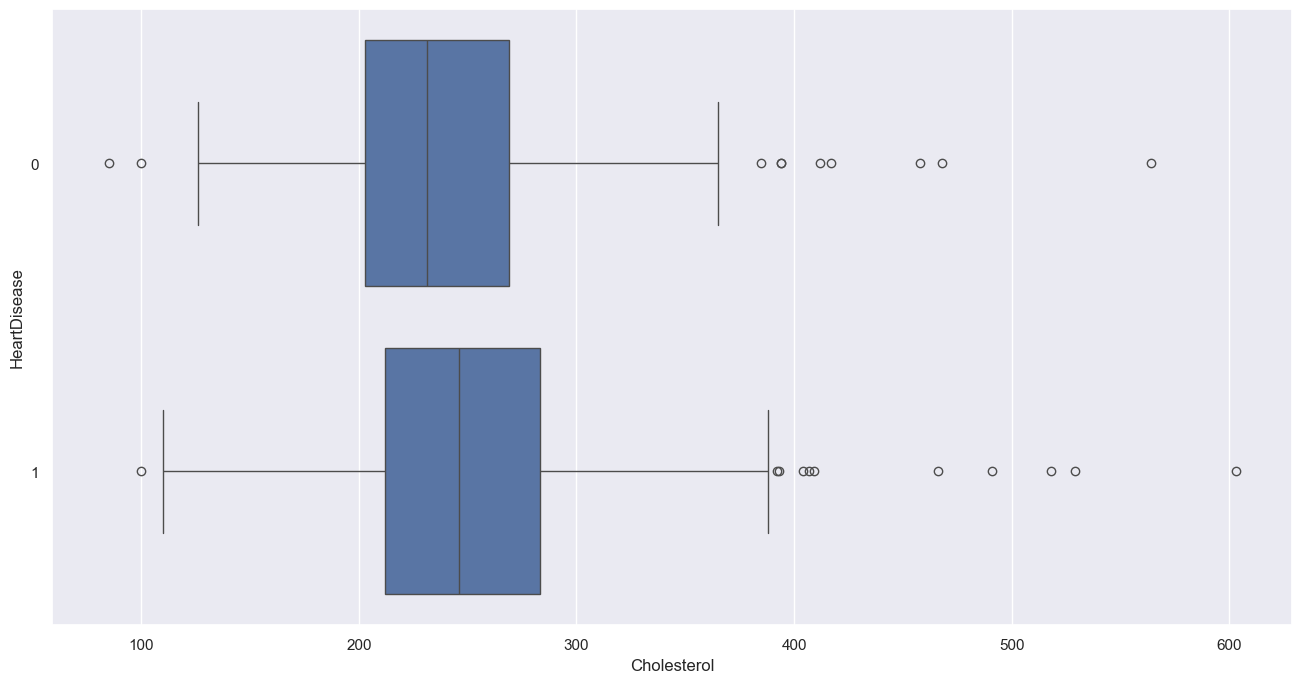

In [42]:
# HeartDisease vs Cholesterol
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Cholesterol', y = 'HeartDisease', data = data,orient="h")

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Cholesterol', y = 'HeartDisease', data = data,orient="h")

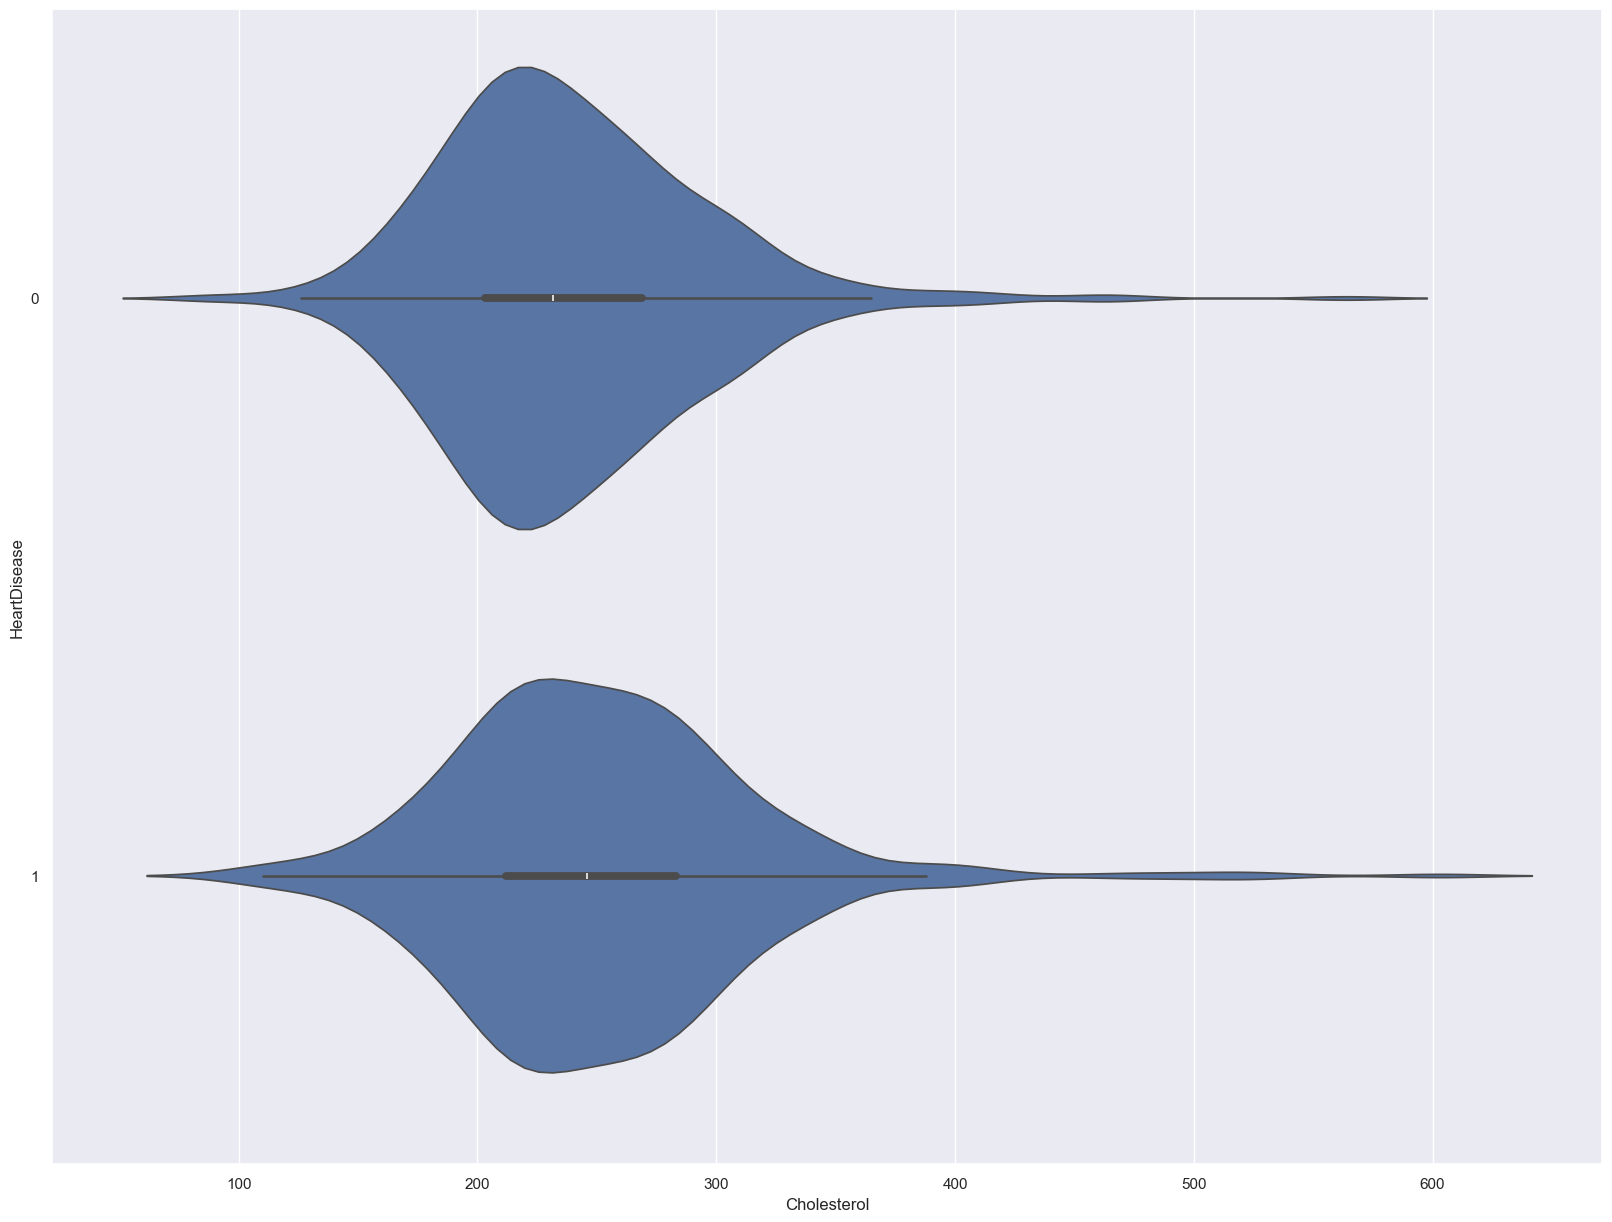

In [43]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='Cholesterol',y='HeartDisease', data=data, orient="h")
plt.show()

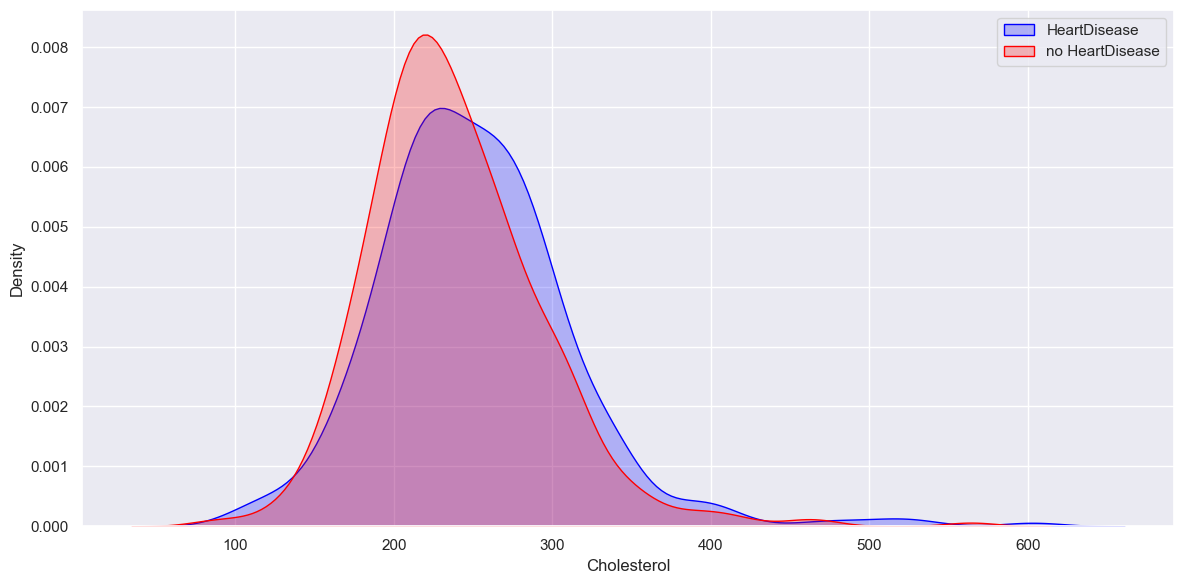

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.HeartDisease==1], x='Cholesterol',
            color='blue', label='HeartDisease', fill=True, ax=ax)
sb.kdeplot(data=data[data.HeartDisease==0], x='Cholesterol',
            color='red', label='no HeartDisease', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Observations
Again, the box plot and KDE plot are the two most effective visualisations of the `Cholesterol` difference of the patients with heart disease and those without heart disease. Though there is a difference in the plots, they are both to a small extent. 

The KDE plot for patients with heart disease is slightly more left-skewed compared to patients without heart disease, which could show the presence of a slight positive relationship between `Cholesterol` and `HeartDisease`.

In the box plot, the median `Cholesterol` and quartiles of those suffering from heart disease are all slightly higher than those who are not suffering from heart disease. 

As such, indicating the possibility that patients with higher `Cholesterol` may have a slightly higher chance of having heart disease.

### 4) MaxHR

<Axes: xlabel='MaxHR'>

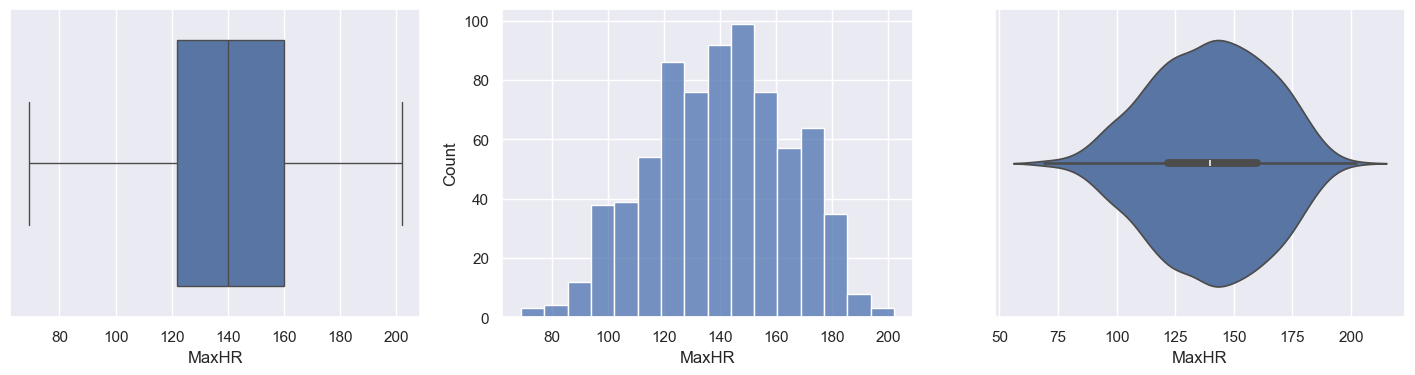

In [45]:
# MaxHR
f, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.boxplot(data = data['MaxHR'], orient = "h", ax = axes[0])
sb.histplot(data = data['MaxHR'], ax = axes[1])
sb.violinplot(data = data['MaxHR'], orient = "h", ax = axes[2])

<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

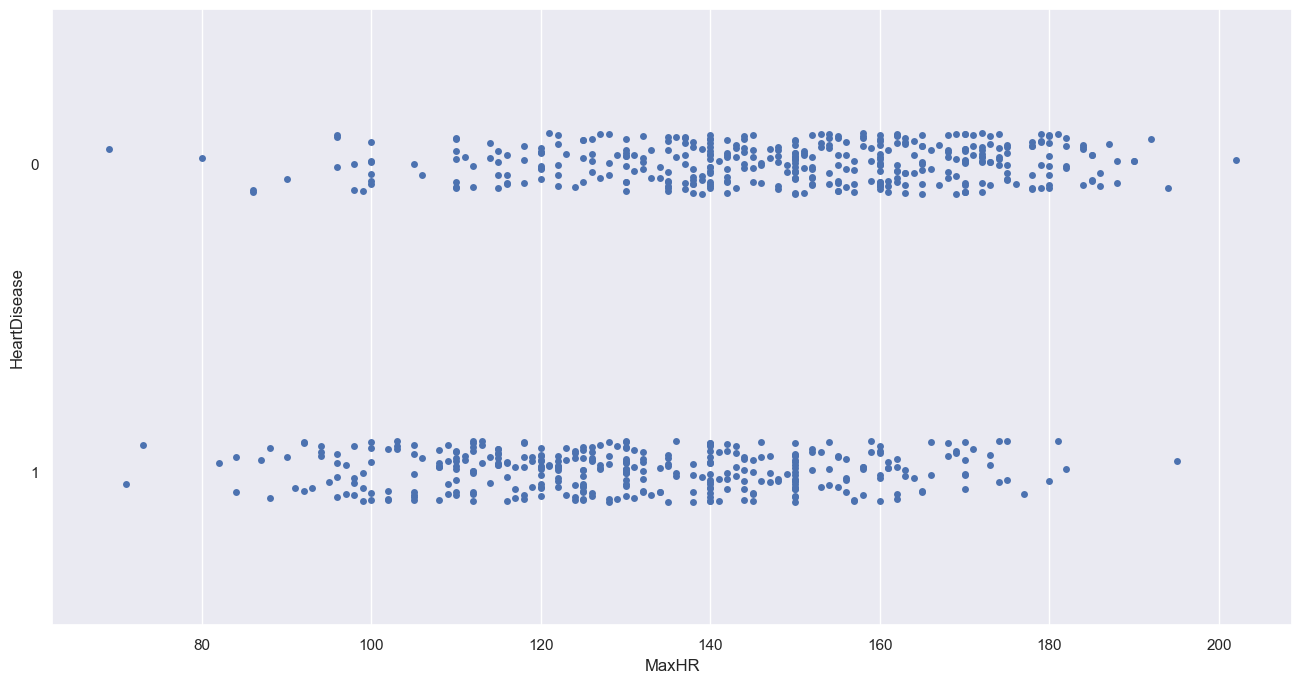

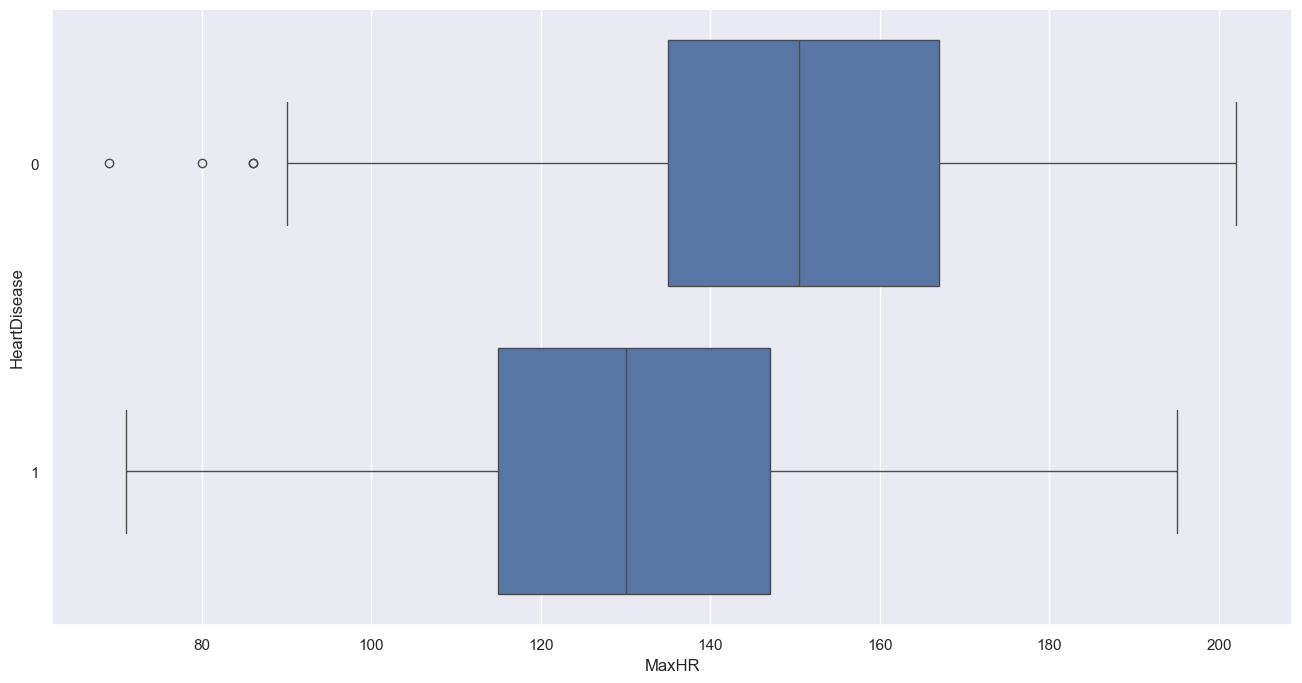

In [46]:
# HeartDisease vs MaxHR
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'MaxHR', y = 'HeartDisease', data = data,orient="h")

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'MaxHR', y = 'HeartDisease', data = data,orient="h")

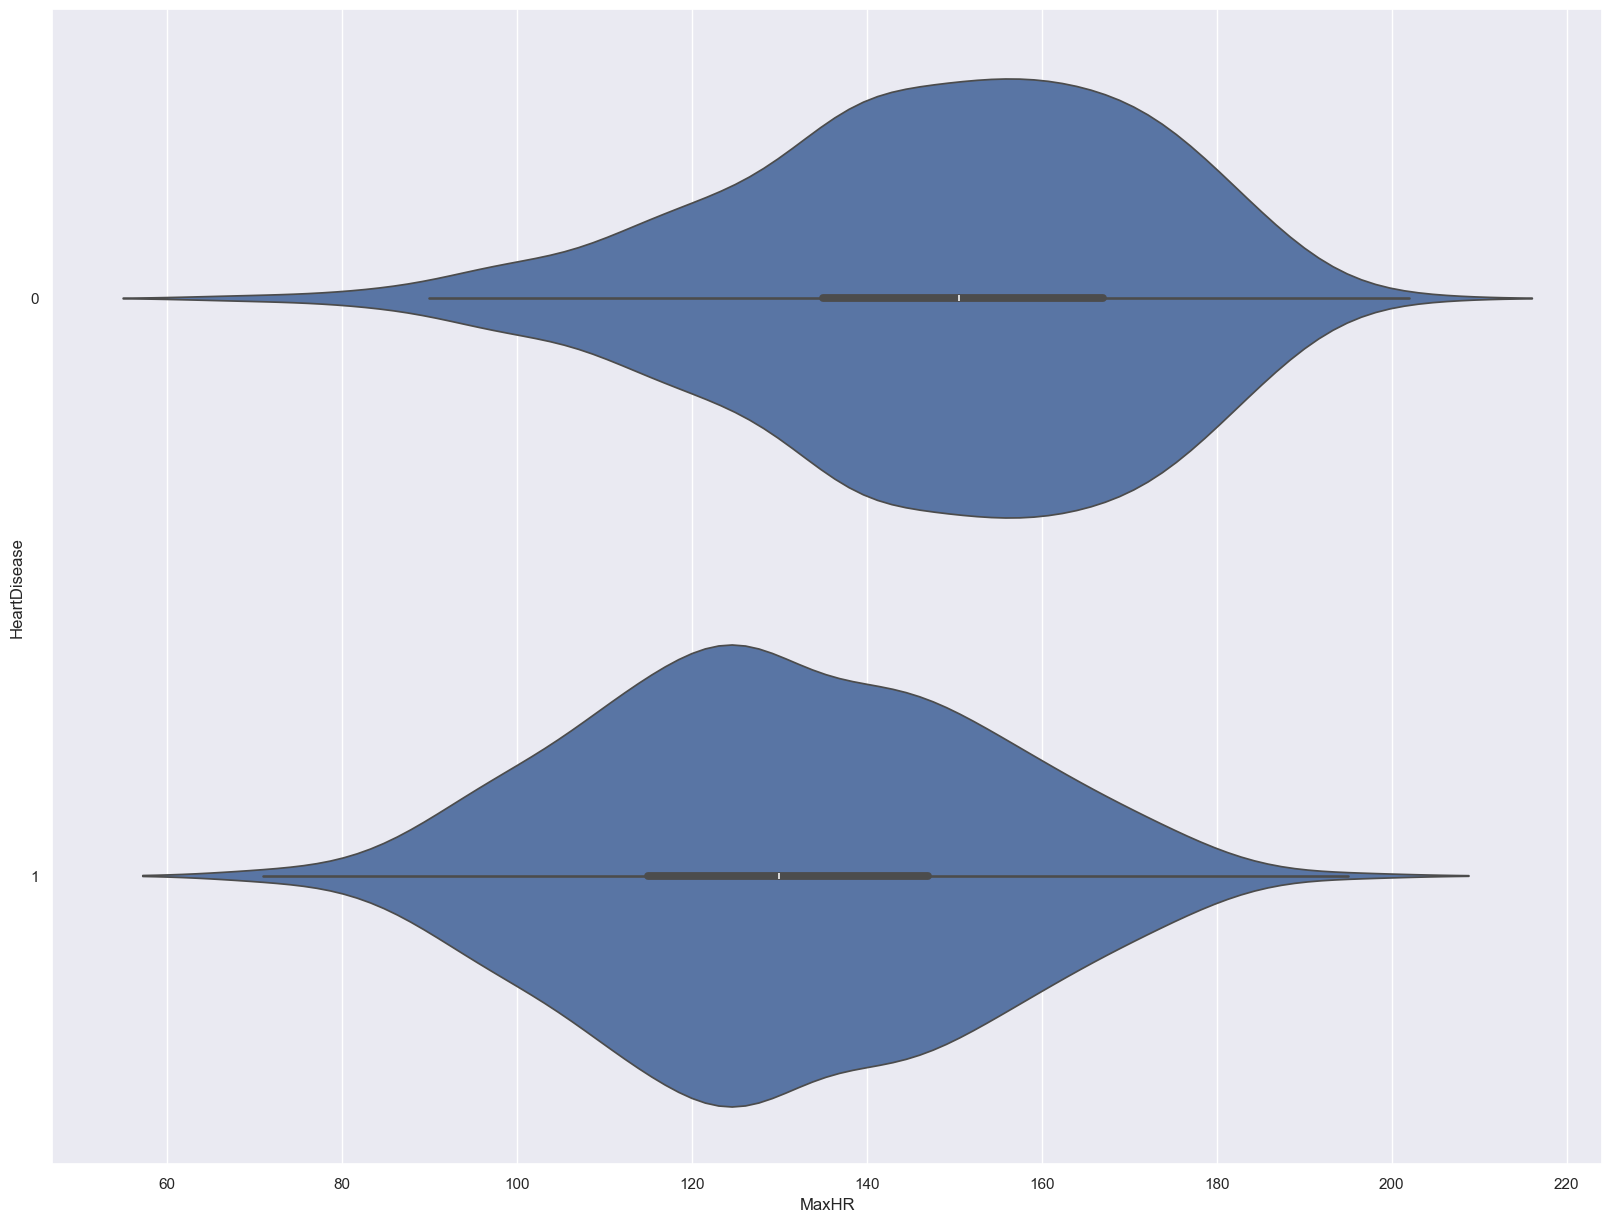

In [47]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='MaxHR',y='HeartDisease', data=data, orient="h")
plt.show()

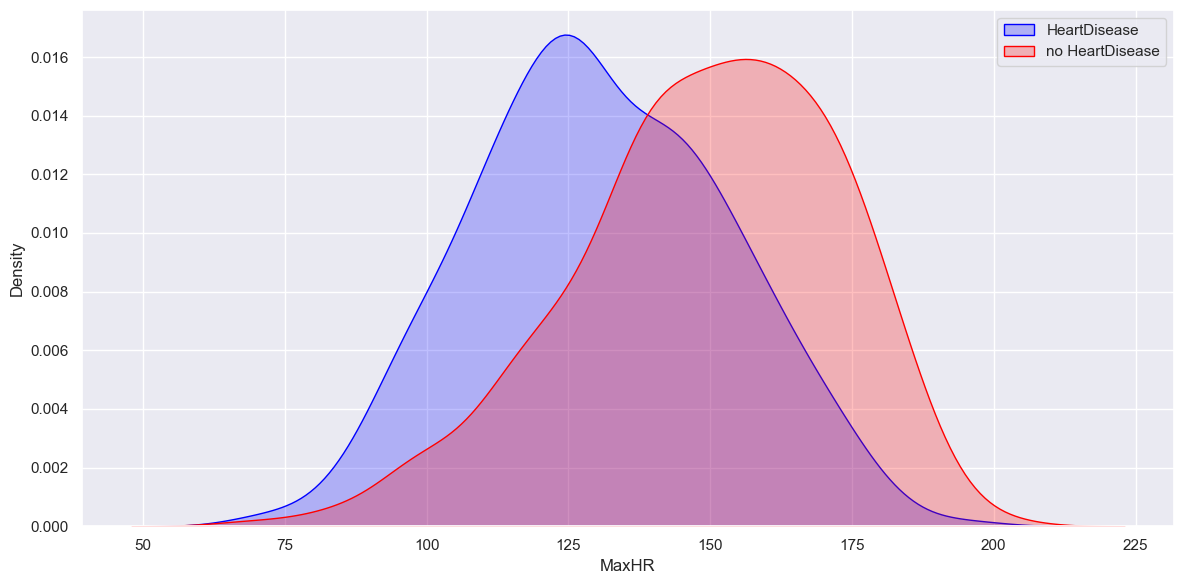

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.HeartDisease==1], x='MaxHR',
            color='blue', label='HeartDisease', fill=True, ax=ax)
sb.kdeplot(data=data[data.HeartDisease==0], x='MaxHR',
            color='red', label='no HeartDisease', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Observations
The difference between the `MaxHR` of patients with heart disease and those without heart disease is significant as the box plot, violin plot, and KDE plot are all indicating a significant change in the shape and position of their graphs.

The box plot shows a decrease in the median `MaxHR` and its quartiles of patients who have heart disease as compared to patients who do not have heart disease.

The violin and KDE plot for patients with heart disease are right-skewed compared to patients without heart disease, which are more left-skewed. This could signify the presence of a negative relationship between `MaxHR` and `HeartDisease`. As such, patients with a lower `MaxHR` may have a higher chance of having heart disease.

This continues to reinforce the possible notion that variables measured while exercising the heart shows a greater displacement between those suffering from heart disease and those who are not.

### 5) Oldpeak

<Axes: xlabel='Oldpeak'>

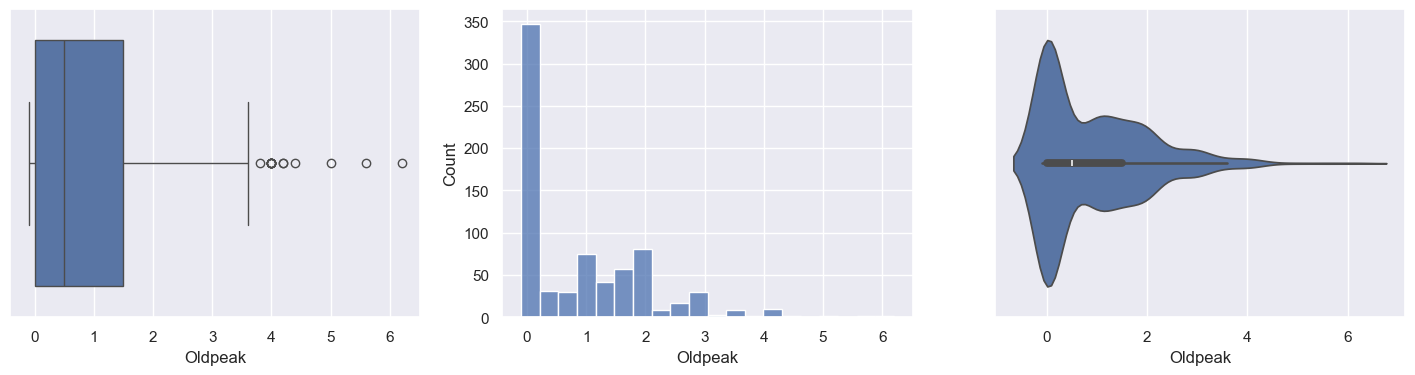

In [49]:
# Oldpeak
f, axes = plt.subplots(1, 3, figsize=(18, 4))

sb.boxplot(data = data['Oldpeak'], orient = "h", ax = axes[0])
sb.histplot(data = data['Oldpeak'], ax = axes[1])
sb.violinplot(data = data['Oldpeak'], orient = "h", ax = axes[2])

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

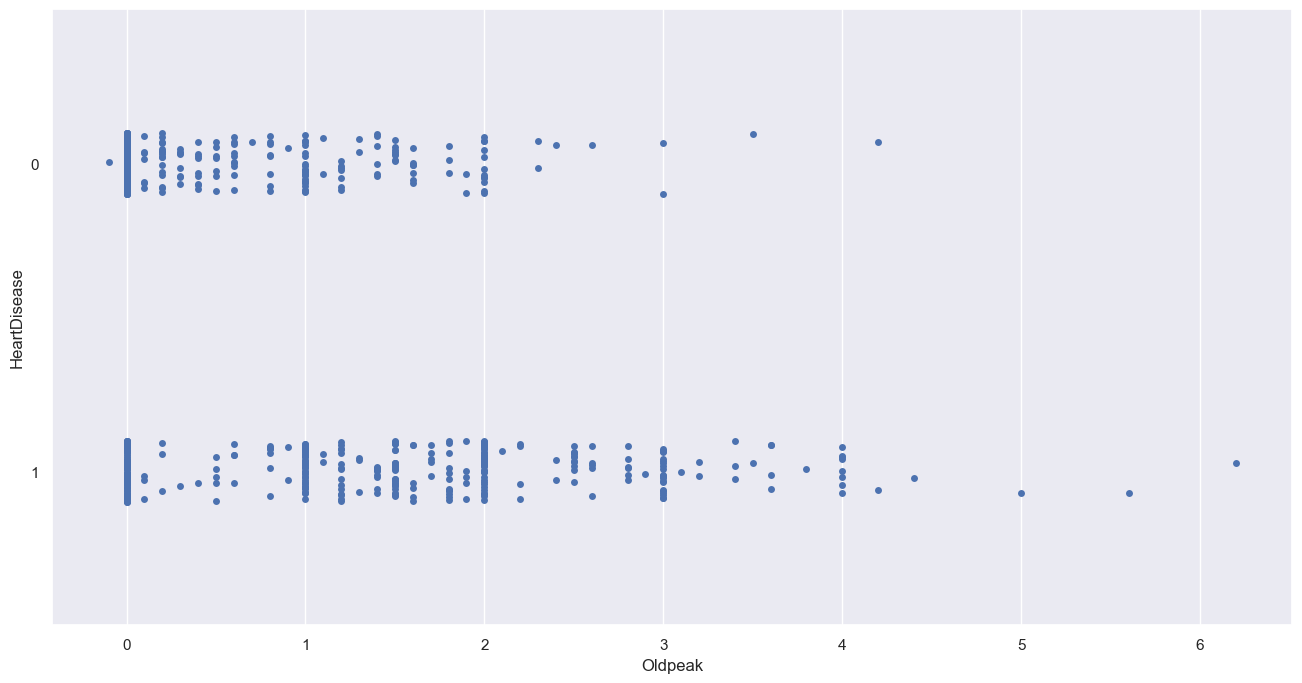

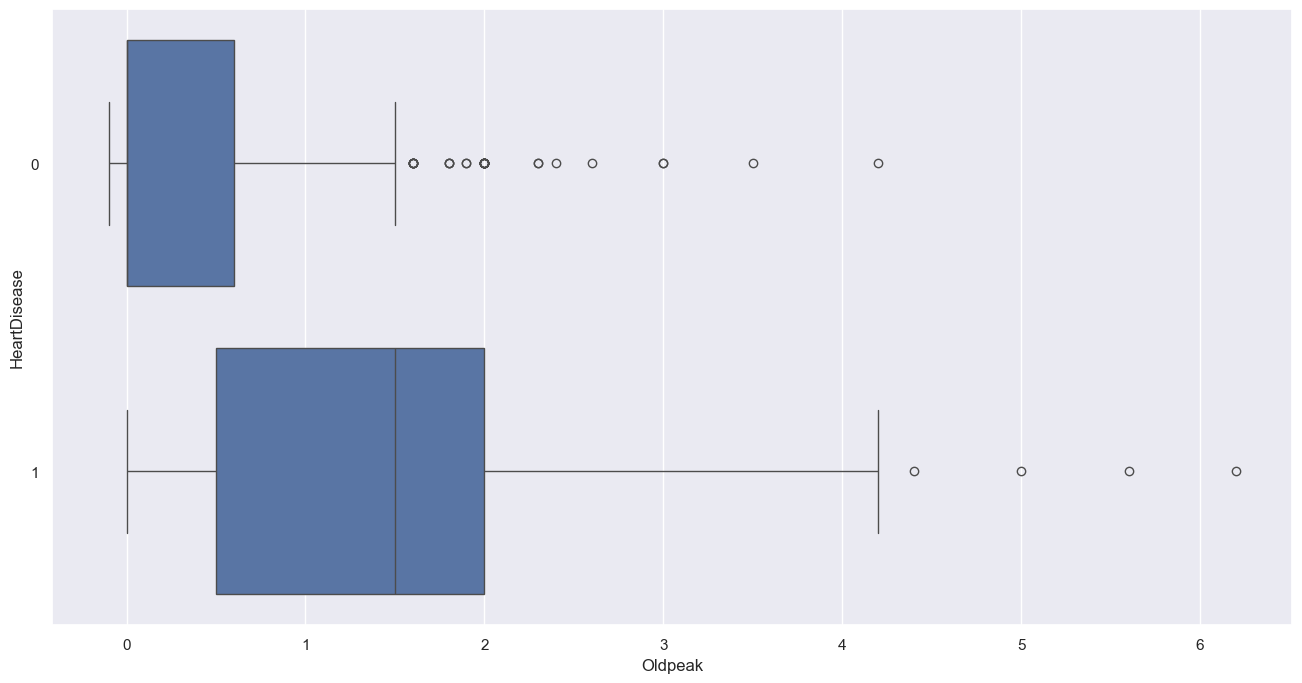

In [50]:
# HeartDisease vs Oldpeak
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Oldpeak', y = 'HeartDisease', data = data,orient="h")

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Oldpeak', y = 'HeartDisease', data = data,orient="h")

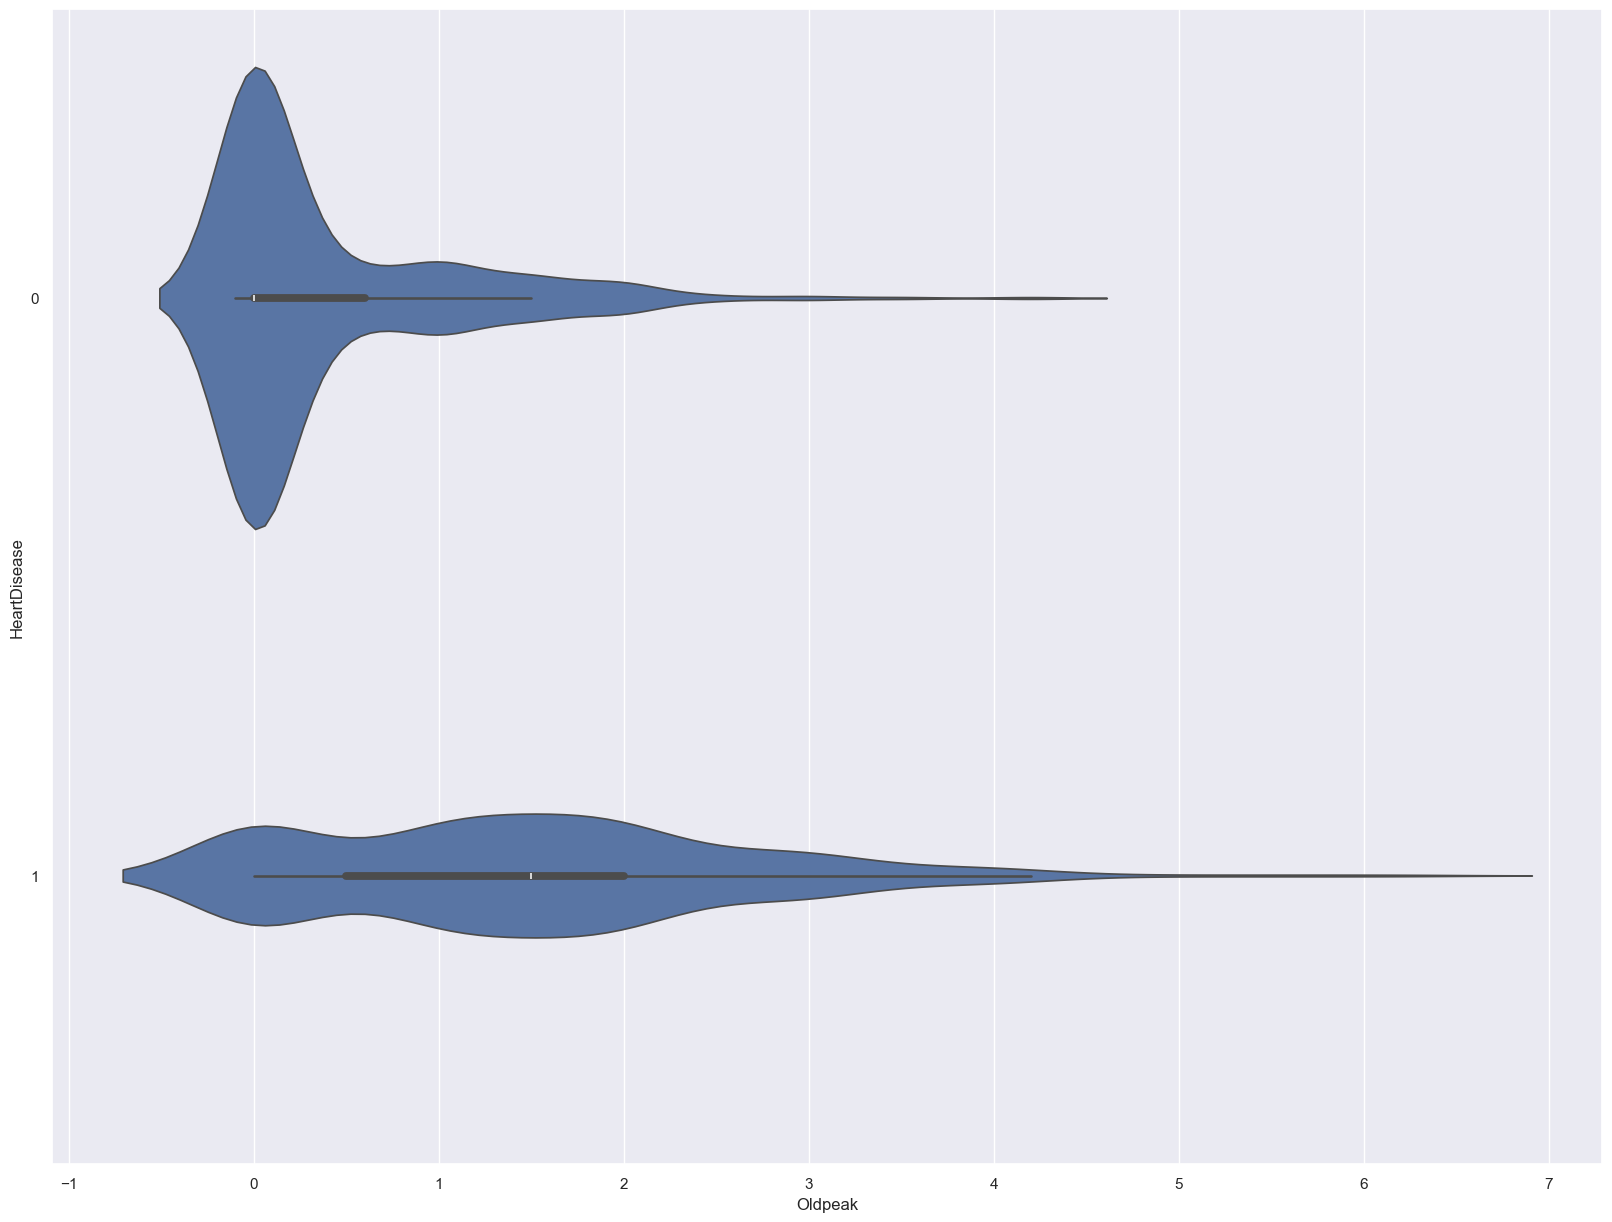

In [51]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='Oldpeak',y='HeartDisease', data=data, orient="h")
plt.show()

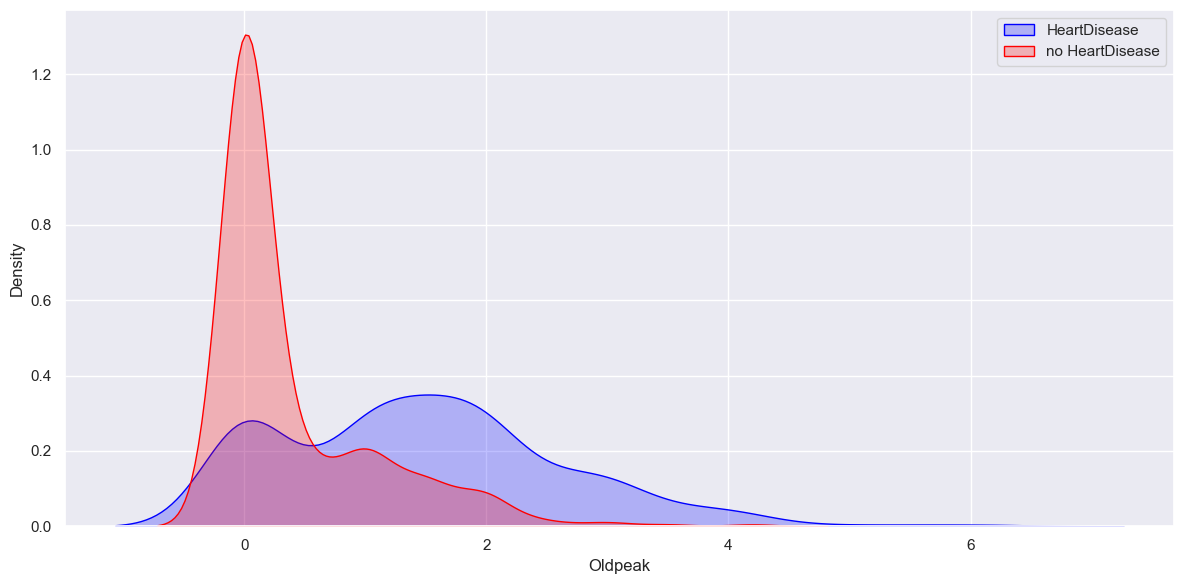

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.HeartDisease==1], x='Oldpeak',
            color='blue', label='HeartDisease', fill=True, ax=ax)
sb.kdeplot(data=data[data.HeartDisease==0], x='Oldpeak',
            color='red', label='no HeartDisease', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

#### Observations
The difference between the `Oldpeak` of patients with heart disease and those without heart disease is very significant as the box plot, violin plot, and KDE plot are all indicating a very significant change in the shape and position of their graphs.

The box plot shows a large difference in the graph of `Oldpeak` for patients who have heart disease as compared to patients who do not have heart disease. The quartiles of `Oldpeak` of patients who do not have heart disease are much more compact than those who have heart disease, showing a significant concentration of results at a certain range.

The violin and KDE plot for patients without heart disease are much more right-skewed compared to patients with heart disease, which are more left-skewed. The mode of `Oldpeak` for patients without heart disease is very clearly at '0', while the graph for patients with heart disease is much more spread out and even. 

This could signify the presence of an interesting relationship between `Oldpeak` and `HeartDisease`. As such, patients with an `Oldpeak` of around '0' could be much less likely to have heart disease.

As such, this relationship may serve to aid medical professionals in prioritising related treatments to patients who are more susceptible to heart failure, since the majority of patients with an ECG reading that indicates an `Oldpeak` of around '0' are statistically less likely to have heart disease than other patients.

### Key Insights

Clinical variables involving exercising the heart (Max HR, Exercise Angina) generally appear to have a stronger relationship with “Heart Disease” compared to sedentary variables (Resting BP, Resting ECG, Chest Pain Type). Hence, inspecting the patient at rest may not be effective in predicting possibility of heart disease.